## imports

In [28]:
import torch
import cv2
import uuid
import os
import time

## Load Model

In [2]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [3]:
!cd yolov5 & pip install -r requirements.txt


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\fatemeh/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-2-14 Python-3.10.8 torch-1.13.0+cu117 CUDA:0 (NVIDIA GeForce GTX 1650 Ti, 4096MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


## Make Detections Using Pre_Trained Model

In [6]:
img = 'https://cdn.vox-cdn.com/thumbor/SLAqByY-1IyAnbvJpxug9I0JZNY=/232x0:2999x2075/920x613/filters:focal(232x0:2999x2075):format(webp)/cdn.vox-cdn.com/uploads/chorus_image/image/44219366/72499026.0.0.jpg'

In [7]:
results = model(img)
results.print()

image 1/1: 613x920 21 cars, 2 trucks
Speed: 9520.1ms pre-process, 131.1ms inference, 19.0ms NMS per image at shape (1, 3, 448, 640)


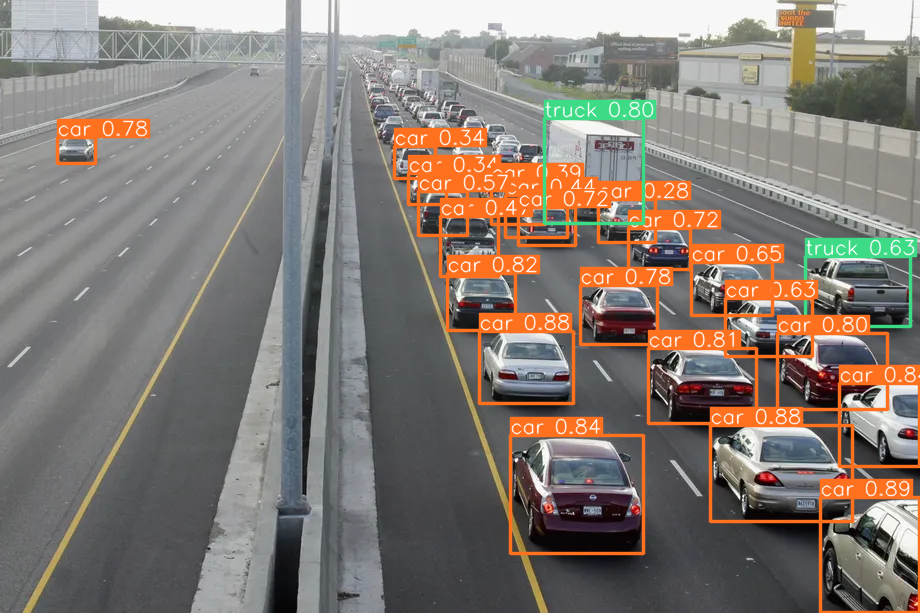

In [8]:
results.show()

In [9]:
np.array(results.render()).shape

(1, 613, 920, 3)

In [10]:
np.squeeze(np.array(results.render())).shape

(613, 920, 3)

In [11]:
cap = cv2.VideoCapture(0)

while cap.isOpened():

    ret, frame = cap.read()
    
    result = model(frame)

    cv2.imshow('YOLO', np.squeeze(result.render()))
    
    if cv2.waitKey(10) & 0XFF == ord('q'):
        break 

cap.release()
cv2.destroyAllWindows()

In [12]:
cap = cv2.VideoCapture('Pexels Videos 1192116.mp4')

while cap.isOpened():

    ret, frame = cap.read()
    
    result = model(frame)

    cv2.imshow('YOLO', np.squeeze(result.render()))
    
    if cv2.waitKey(10) & 0XFF == ord('q'):
        break 

cap.release()
cv2.destroyAllWindows()

## Transfer Learning

In [13]:
labels = ['awake', 'drowsy']
IMG_PATH = os.path.join('data', 'images')
num_imgs = 10

In [14]:
cap = cv2.VideoCapture(0)

while cap.isOpened():

    for label in labels:
        print(f'Capturing Images for: {label}')
        time.sleep(5)
        
        for num in range(num_imgs):

            print(f'Capturing Images for: {label} , {num}')
            
            ret, frame = cap.read()

            img_name = os.path.join(IMG_PATH, label +'.'+str(uuid.uuid1())+'.jpg')

            cv2.imwrite(img_name, frame)

            cv2.imshow('Image Collection', frame)
        
            time.sleep(2)
        
    
    break
                 
cap.release()
cv2.destroyAllWindows()
   

In [15]:
!git clone https://github.com/tzutalin/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [19]:
!pip3 install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [26]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 200 --data dataset.yaml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=200, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-107-g7a972e8 Python-3.10.8 torch-1.13.1+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1

In [7]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp/weights/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\fatemeh/.cache\torch\hub\master.zip
YOLOv5  2023-2-18 Python-3.10.8 torch-1.13.0+cu117 CUDA:0 (NVIDIA GeForce GTX 1650 Ti, 4096MiB)

Fusing layers... 
Model summary: 157 layers, 7061368 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


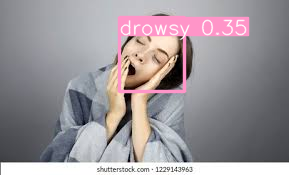

In [27]:
img = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQZUttkusmKQXKuHGJjqhgfz10eSSjkPWM_JQ&usqp=CAU'
results = model(img)
results.show()

In [ ]:
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()